<a href="https://colab.research.google.com/github/hooman007/cs533-hw1/blob/tinker/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPSC 533R Visual AI - Assignment 1

In [13]:
# import native modules
import os
from os.path import exists

# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.optim as optim

# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

In [14]:
print(torch.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

if not exists('./data'):
  os.makedirs('./data')

1.6.0


In [15]:
# Use standard FashionMNIST dataset
def gray_to_color(x):
    return x.repeat(3, 1, 1)

#train_set = torchvision.datasets.FashionMNIST(
train_set = torchvision.datasets.MNIST(
    root = './data/DatasetFashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        gray_to_color,
    ])
)
loader = torch.utils.data.DataLoader(train_set, batch_size = 8, num_workers=0)

100.1%

Extracting ./data/DatasetFashionMNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/DatasetFashionMNIST/MNIST/raw


113.5%

Extracting ./data/DatasetFashionMNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/DatasetFashionMNIST/MNIST/raw


100.4%

Extracting ./data/DatasetFashionMNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/DatasetFashionMNIST/MNIST/raw


180.4%

Extracting ./data/DatasetFashionMNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/DatasetFashionMNIST/MNIST/raw
Processing...
Done!


In [16]:
loader.dataset.__len__()

60000

In [17]:
network = torchvision.models.resnet18(num_classes=10).to(device)

In [18]:
losses = []
iterator = iter(loader)
optimizer = optim.SGD(network.parameters(), lr=0.001)
for i in range(200): #range(len(loader)):
    batch = next(iterator)
    preds = network(batch[0].to(device))
    loss = nn.functional.cross_entropy(preds, batch[1].to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if i%10==0:
        print(i,losses[-1])

0 2.6182634830474854
10 2.3296031951904297
20 2.283421277999878
30 2.0594866275787354
40 1.46198570728302
50 1.5286784172058105
60 1.3991951942443848
70 1.9203945398330688
80 1.6595655679702759
90 1.4454305171966553
100 1.2296948432922363
110 1.0041390657424927
120 0.9647649526596069
130 0.792611300945282
140 1.8522603511810303
150 0.7126403450965881
160 1.5424578189849854
170 1.2592737674713135
180 0.6911829710006714
190 0.8315699696540833


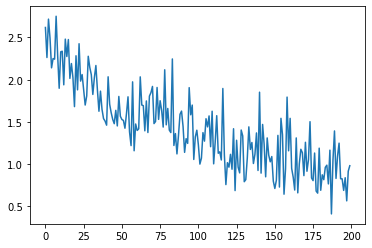

In [19]:
import matplotlib.pyplot as plt
plt.plot(losses)